### 강의영상



{{<video https://youtu.be/playlist?list=PLQqh36zP38-x9J2lltwa_uYKXEvecA5ne&si=ZFXQ19M4FVY8Clhe>}}

---

### Imports

In [13]:
#| echo: true
import numpy as np
import matplotlib.pyplot as plt

---

### "추정을 잘한다"란?

![그림1: 솜씨좋은 사격사?](https://www.kdnuggets.com/wp-content/uploads/arya_biasvariance_tradeoff_5.png)

> ref: <https://www.kdnuggets.com/2022/08/biasvariance-tradeoff.html>

---

`# 예제1`

아래와 같은 데이터를 관찰하자. 

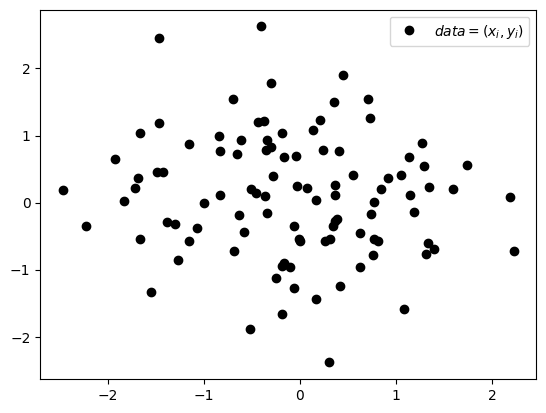

In [154]:
#| echo: true
#| fig-cap: "그림2: $data=(x_i,y_i)$의 산점도"
np.random.seed(43052)
x = np.random.normal(size=100)
y = np.random.normal(size=100)
plt.plot(x,y,'ok',label=r"$data=(x_i,y_i)$")
plt.legend()

---

중심을 추정하는 문제를 고려하자. 

- A: 지금보니까 x,y의 평균은 모두 0 근처에 있는것 같지 않아? 굳이 극단적인 값을 고려할 필요는 없겠어. 그러니까 데이터중 상위 10%와 하위 10$를 잘라서 버린후 남은값들의 평균을 구하는건 어떄? 
- B: 머리아프게 굳이? 그냥 평균으로 추정하는건 어때?

누구의 말이 더 합리적일까? 

----

`-` 아이디어: A의 방식으로 추정한 1000결과를 가져오고, B의 방식으로 추정한 1000개의 결과를 가져와서 비교해보자. 

In [141]:
#| echo: true
A = [] 
B = [] 
for i in range(10000):
    x = np.random.normal(size=100)
    y = np.random.normal(size=100)
    #---#
    x.sort()
    y.sort()
    A.append([np.mean(x[10:-10]),np.mean(y[10:-10])])
    B.append([np.mean(x),np.mean(y)])
A = np.array(A)
B = np.array(B)

---

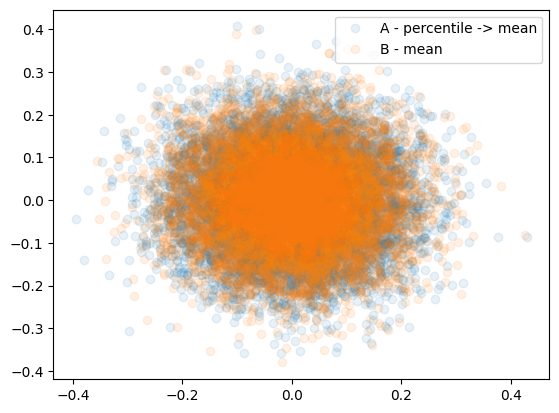

In [143]:
#| echo: true
#| fig-cap: "그림3: A방식, B방식으로 추정한 결과 // B가 좀 더 우수해보인다." 
plt.plot(A[:,0],A[:,1],'o',alpha=0.1,label="A - percentile -> mean")
plt.plot(B[:,0],B[:,1],'o',alpha=0.1,label="B - mean")
plt.legend()

`#`

---

`# 예제2`

다시 아래와 같은 데이터를 상상하자. 

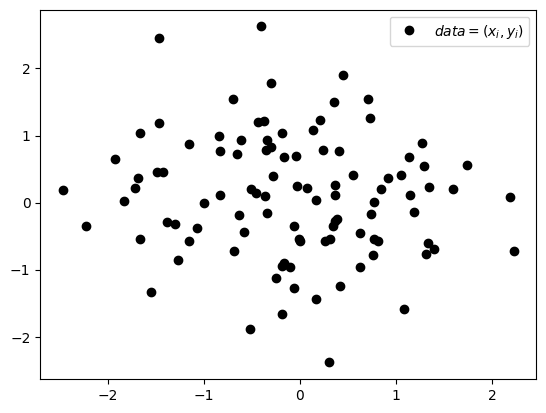

In [155]:
#| echo: false
#| fig-cap: "."
np.random.seed(43052)
x = np.random.normal(size=100)
y = np.random.normal(size=100)
plt.plot(x,y,'ok',label=r"$data=(x_i,y_i)$")
plt.legend()

중심을 추정하는 문제를 고려하자. 

- A: 중앙값 한번 써보는게 어때?
- B: 그냥 평균으로 추정하는게 젤 좋다니까?

누구의 말이 더 합리적일까? 

---

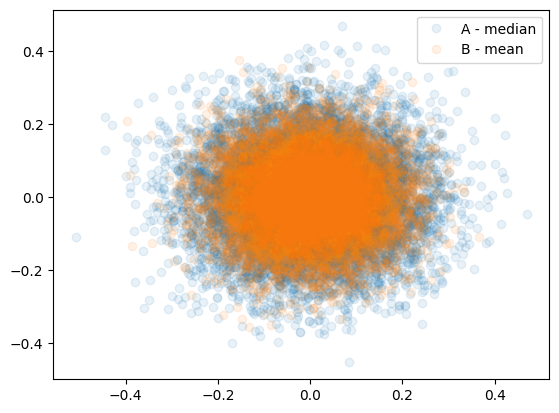

In [156]:
#| echo: true
#| fig-cap: "그림4: A방식, B방식으로 추정한 결과 // 역시 평균기법인 B가 더 우수해보인다." 
A = [] 
B = [] 
for i in range(10000):
    x = np.random.normal(size=100)
    y = np.random.normal(size=100)
    #---#
    A.append([np.median(x),np.median(y)])
    B.append([np.mean(x),np.mean(y)])
    
A = np.array(A)
B = np.array(B)
plt.plot(A[:,0],A[:,1],'o',alpha=0.1,label="A - median")
plt.plot(B[:,0],B[:,1],'o',alpha=0.1,label="B - mean")
plt.legend()

---

`# 예제3`

이제 아래와 같은 데이터를 상상하자. 

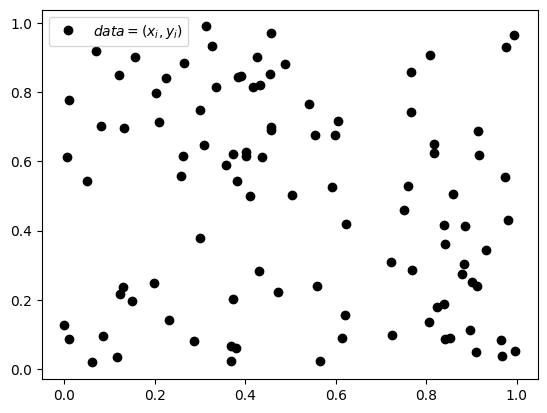

In [ ]:
#| echo: true
#| fig-cap: "그림5: $data=(x_i,y_i)$의 산점도, $x_i,y_i$ 모두 0~1사이의 숫자를 (같은확률로) 뽑은것이다."
np.random.seed(43052)
x = np.random.uniform(size=100)
y = np.random.uniform(size=100)
plt.plot(x,y,'ok',label=r"$data=(x_i,y_i)$")
plt.legend()

---

중심을 추정하는 문제를 고려하자. 

- A: 그냥 평균으로 추정하는게 젤 좋음. 그러니까 $(\bar{x},\bar{y})$로 추정하는게 제일 좋아. 
- B: 난 좀 특이하게 하고 싶어. $x$중에서 가장 작은 값과 큰값을 뽑고 평균을 구해. 그리고 $y$에서 가장 작은값과 큰 값을 뽑고 평균을 구할거야. 그러니까 나는 $$\left(\frac{\min(x)+\max(x)}{2}, \frac{\min(y)+\max(y)}{2}\right)$$ 로 추정하는게 좋을 것 같아. 

누구의 말이 더 합리적일까? 

---

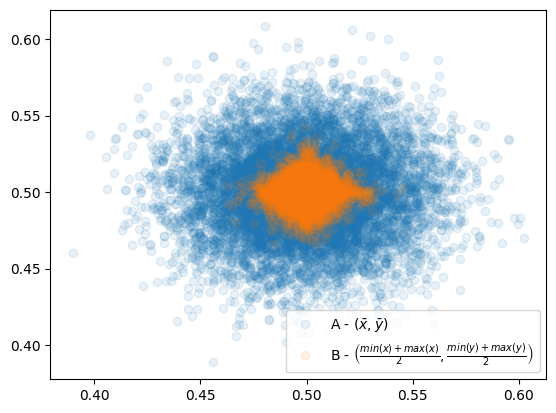

In [182]:
#| echo: true
#| fig-cap: "그림4: A방식, B방식으로 추정한 결과" 
A = [] 
B = [] 
for i in range(10000):
    x = np.random.uniform(size=100)
    y = np.random.uniform(size=100)
    #---#
    A.append([np.mean(x),np.mean(y)])
    B.append([(min(x)+max(x))/2,(min(y)+max(y))/2])
    
A = np.array(A)
B = np.array(B)
plt.plot(A[:,0],A[:,1],'o',alpha=0.1,label="A - $(\\bar{x},\\bar{y})$")
plt.plot(B[:,0],B[:,1],'o',alpha=0.1,label="B - $\\left(\\frac{min(x)+max(x)}{2},\\frac{min(y)+max(y)}{2}\\right)$")
plt.legend()

---

`-` 놀라운점 

1. 차이가 왜이렇게 많이남? 
2. 주황색은 모양이 왜저래? 

`-` 피셔의주장

- 아무 생각 없이 (분포를 고려하지 않고) 무조건 직관적인 Method of Moments Estimation (MME) 방식으로 추정하는건 최선의 결과를 가져오지 못한다. 
- 만약 MME방식이 잘 동작했다면 그건 운이 좋아서 그렇다. *("적률법의 통계량들이 정규 곡선 근처에서 100% 효율로 수렴하는 이유는, 정규 곡선을 맞추는 데 있어 처음 두 적률이 **마침** 최적 통계량(optimum statistics)이기 때문이다", "정규 곡선 주변에서 적률법의 높은 효율성은 Pearson 곡선 형태를 지정하는 공식과 적률법이 최대 우도 해법을 제공하는 곡선 시스템(4차 지수 곡선)이 일치하기 때문에 발생한다")*